In [2]:
import pandas as pd


In [3]:
# 2. Define the path to the ratings file
# '../data/' navigates one level up from the 'notebooks' folder
# into the 'data' folder.
ratings_file_path = '../data/ratings.dat'

# 3. Load the data into a DataFrame
# NOTE: MovieLens 1M uses '::' as a separator, which is non-standard.
# We must specify the separator, tell Python not to expect a header row,
# and provide our own column names.
ratings = pd.read_csv(
    ratings_file_path,
    sep='::',
    engine='python',        # engine='python' is needed for multi-character separators
    header=None,
    names=['UserID', 'MovieID', 'Rating', 'Timestamp']
)

print("Ratings DataFrame Loaded Successfully.")


Ratings DataFrame Loaded Successfully.


In [4]:
ratings.head()

,UserID,MovieID,Rating,Timestamp
0,1,1193,5,978300760
1,1,661,3,978302109
2,1,914,3,978301968
3,1,3408,4,978300275
4,1,2355,5,978824291


In [5]:
ratings.shape

(1000209, 4)

In [6]:
ratings.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000209 entries, 0 to 1000208
Data columns (total 4 columns):
 #   Column     Non-Null Count    Dtype
---  ------     --------------    -----
 0   UserID     1000209 non-null  int64
 1   MovieID    1000209 non-null  int64
 2   Rating     1000209 non-null  int64
 3   Timestamp  1000209 non-null  int64
dtypes: int64(4)
memory usage: 30.5 MB


In [7]:
# Load Movies Data (using '|' or '::' depending on the file version, MovieLens 1M uses '::')
movies = pd.read_csv(
    '../data/movies.dat',
    sep='::',
    engine='python',
    header=None,
    names=['MovieID', 'Title', 'Genres'],
    encoding='latin-1' # Use latin-1 due to title characters
)
print("Movies DataFrame Loaded.")
print(movies.head())

users = pd.read_csv(
    '../data/users.dat',
    sep='::',
    engine='python',
    header=None,
    names=['UserID', 'Gender', 'Age', 'Occupation', 'Zip-code']
)
print('Users dataframe loaded')
print(users.head())

Movies DataFrame Loaded.
   MovieID                               Title                        Genres
0        1                    Toy Story (1995)   Animation|Children's|Comedy
1        2                      Jumanji (1995)  Adventure|Children's|Fantasy
2        3             Grumpier Old Men (1995)                Comedy|Romance
3        4            Waiting to Exhale (1995)                  Comedy|Drama
4        5  Father of the Bride Part II (1995)                        Comedy
Users dataframe loaded
   UserID Gender  Age  Occupation Zip-code
0       1      F    1          10    48067
1       2      M   56          16    70072
2       3      M   25          15    55117
3       4      M   45           7    02460
4       5      M   25          20    55455


In [8]:
ratings['UserID'].nunique()

6040

Matplotlib is building the font cache; this may take a moment.


<Axes: xlabel='Rating'>

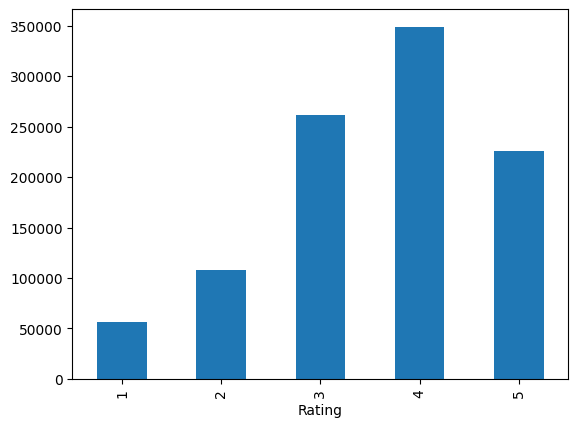

In [9]:
ratings['Rating'].value_counts().sort_index().plot(kind='bar')

Total Users: 6040
Total Movies: 3706
Total Ratings: 1000209

Rating Distribution:


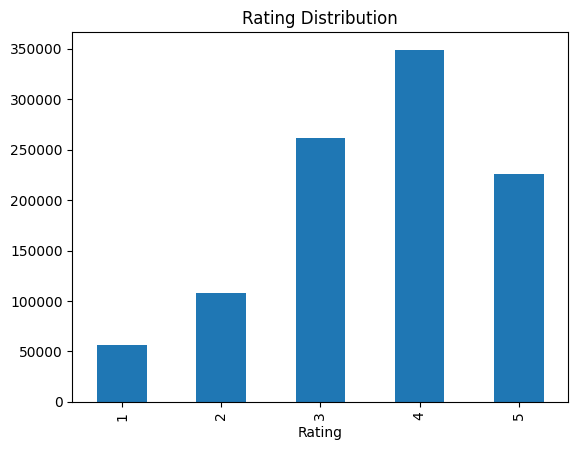


Sparsity of the User-Item Matrix: 0.9553 (meaning 95.53% of possible ratings are unknown)


In [12]:
# 1. Total Counts
n_users = ratings['UserID'].nunique()
n_movies = ratings['MovieID'].nunique()
n_ratings = ratings.shape[0]

print(f"Total Users: {n_users}")
print(f"Total Movies: {n_movies}")
print(f"Total Ratings: {n_ratings}")

# 2. Rating Distribution (requires matplotlib, which you installed)
import matplotlib.pyplot as plt
print("\nRating Distribution:")
ratings['Rating'].value_counts().sort_index().plot(kind='bar', title='Rating Distribution')
plt.show()

# 3. Sparsity (Calculate the percentage of missing values in the User-Item matrix)
total_possible = n_users * n_movies
sparsity = 1 - (n_ratings / total_possible)
print(f"\nSparsity of the User-Item Matrix: {sparsity:.4f} (meaning {sparsity*100:.2f}% of possible ratings are unknown)")

In [13]:
# Group by MovieID and count the number of ratings for each movie
movie_counts = ratings.groupby('MovieID')['Rating'].count()

# Merge with the movies DataFrame to see the titles
popular_movies = pd.merge(
    movie_counts, 
    movies[['MovieID', 'Title']], 
    on='MovieID'
).sort_values(by='Rating', ascending=False)

print("\nTop 10 Most Rated Movies (Popularity Baseline):")
print(popular_movies.head(10))



Top 10 Most Rated Movies (Popularity Baseline):
      MovieID  Rating                                              Title
2651     2858    3428                             American Beauty (1999)
253       260    2991          Star Wars: Episode IV - A New Hope (1977)
1106     1196    2990  Star Wars: Episode V - The Empire Strikes Back...
1120     1210    2883  Star Wars: Episode VI - Return of the Jedi (1983)
466       480    2672                               Jurassic Park (1993)
1848     2028    2653                         Saving Private Ryan (1998)
575       589    2649                  Terminator 2: Judgment Day (1991)
2374     2571    2590                                 Matrix, The (1999)
1178     1270    2583                          Back to the Future (1985)
579       593    2578                   Silence of the Lambs, The (1991)
